Project: Baryon mass fraction from galaxies at z=0 from survey

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import scipy
from astropy import constants as const
from scipy import optimize
import scipy.integrate as integrate
from scipy.integrate import quad 
from scipy.special import *
import math

In [3]:
# Sersic general equation for any n. Eq. 2.22 from Galaxy Formation & Evolution 
# Need to define Reff first

def Reff(a, b, g, M0, Ms):
    #Efficetive radius of a galaxy @ which  half of the total light of the system is emitted.
    #Mosleh 2013  eq:4 for parameters a,b,g
    #input Ms, M0 units
    #output: radius units: kpc
    
    return g*(Ms**a)*(1+(Ms/M0))**(b-a)


def sersic_mass_profile(I0, n, Re, r):
    # The surface brightness profile of spheroidal galaxies is generally well fit by the Sersic profile
    # Compare to sersic mass density 
    # I(R) = I0*exp[-Bn(R/Re)**(1/n)] = Ie*exp[-Bn{(R/Re)**(1/n)-1}]
    # I0 = Ie*exp(Bn)
    # Bn 2n-0.324 (but only for n=>1) (B beta)
    
    #Re = Reff(a, b, g, M0, Ms)
    Bn = 2*n-0.324
    ratio = (r/Re)**(1/n)
    exponent = -Bn*ratio
    
    return I0*np.exp(exponent)

# Total luminosity. Eq. 2.24 from Galaxy Formation & Evolution 
# The total luminosity of a spherical system with a Sersic profile is given by this equation.
# Compare to mass_prof_disk/sph from old code 



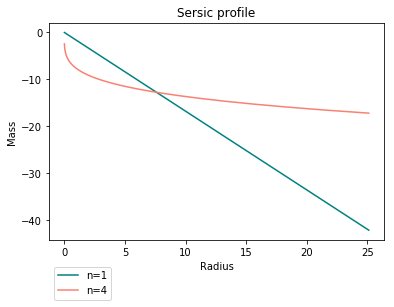

In [5]:
r = radius = np.logspace(-2, 1.4, 50)

sm_n1 = sersic_mass_profile(1, 1, 1, r)
sm_n4 = sersic_mass_profile(1, 4, 1, r)

plt.title('Sersic profile')
plt.plot(r, np.log(sm_n1), '-', color='teal', label='n=1')
plt.plot(r, np.log(sm_n4), '-', color='salmon', label='n=4')
plt.xlabel('Radius')
plt.ylabel('Mass')
plt.legend(loc=9, bbox_to_anchor=(0.1, -0.1), ncol=1)
plt.show()